# Import Library

In [1]:
# call libraries
# Python Libraries are a set of useful functions that eliminate the need for writing codes from scratch.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [2]:
# read data from google sheet
sheet_url = 'https://docs.google.com/spreadsheets/d/1iBPftc4o8mIvw2DoGF3H26fKxVaztcwu4M1DG6Of27c/edit#gid=1202070111'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(sheet_url_trf)
# df = pd.read_csv(sheet_url_trf, error_bad_lines=False)
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [4]:
df.duplicated().sum()

df[df.duplicated()]

,Name,Sales,Series,Release,Genre,Developer,Publisher
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,3/1/2013,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,11/1/2015,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [5]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [7]:
df['Release'] = pd.to_datetime(df['Release'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


# Exploration

### 1. Which game is the oldest and the newest games in that dataset

In [9]:
oldest_game = df[['Name', 'Release']].sort_values('Release').head(1)
newest_game = df[['Name', 'Release']].sort_values('Release', ascending=False).head(1)

print(oldest_game)
print(30*'-')
print(newest_game)

        Name    Release
133  Hydlide 1984-12-01
------------------------------
       Name    Release
20  Valheim 2021-02-01


### 2. Which publisher published most of the games?

In [10]:
publisher = df.groupby('Publisher', as_index=False)['Name'].nunique()
publisher.sort_values('Name', ascending=False).head()

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


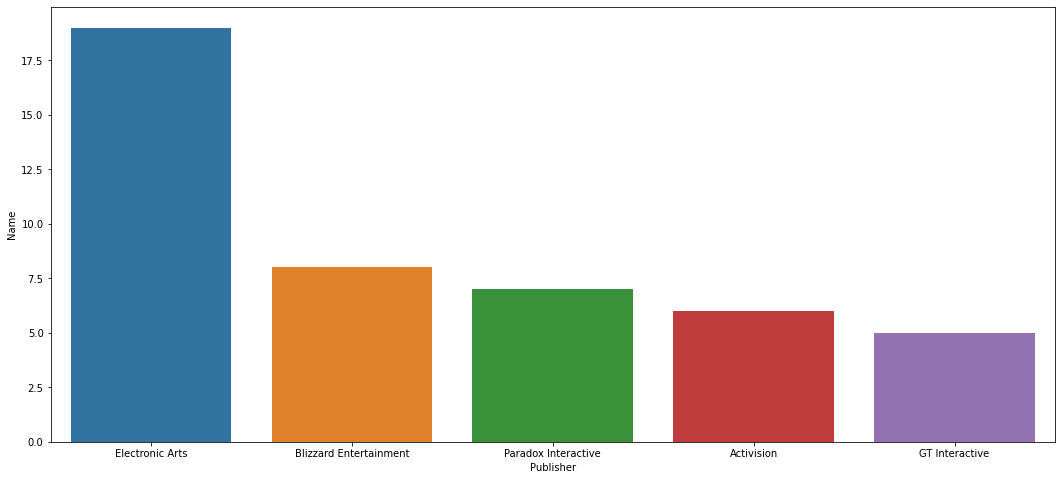

In [11]:
plt.rcParams['figure.figsize'] = (18,8)
sns.barplot('Publisher', 'Name', data = publisher.sort_values('Name', ascending=False).head())

### 3. Which developer developed most of the games?

In [12]:
developer = df.groupby('Developer', as_index=False)['Name'].nunique()
developer.sort_values('Name', ascending=False).head()

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


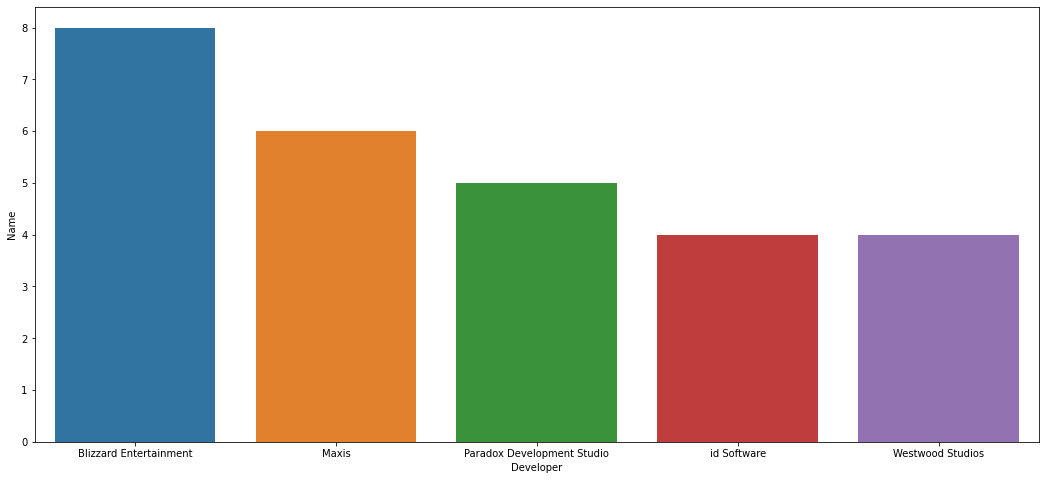

In [13]:
plt.rcParams['figure.figsize'] = (18,8)
sns.barplot('Developer', 'Name', data = developer.sort_values('Name', ascending=False).head())

### 4. Which series is the most sales?

In [14]:
series = df.groupby('Series', as_index=False).agg({'Sales':'sum', 'Name':'nunique'})
series.sort_values('Sales', ascending=False).head()

,Series,Sales,Name
47,Minecraft,33.0,1
22,Diablo,26.0,3
75,The Sims,24.0,3
36,Half-Life,21.0,2
85,Warcraft,19.0,3


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


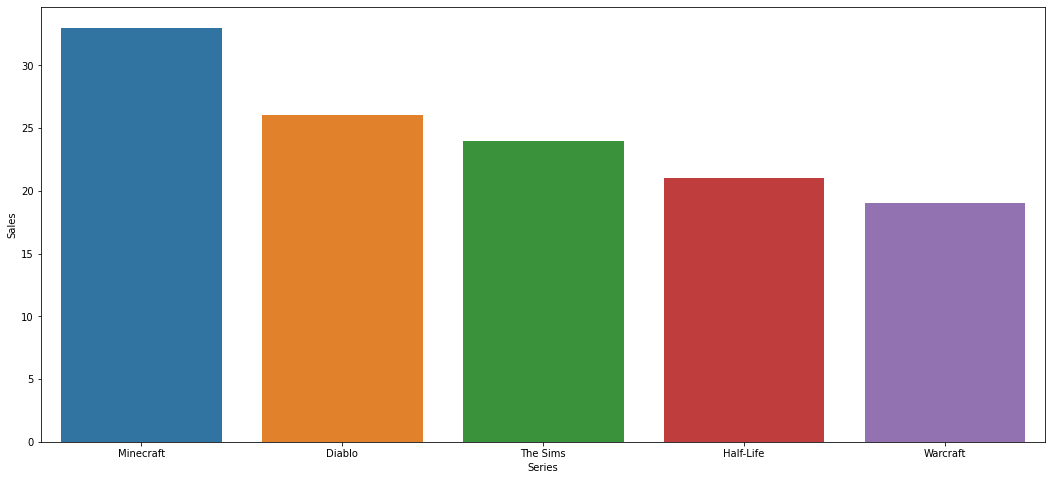

In [15]:
plt.rcParams['figure.figsize'] = (18,8)
sns.barplot('Series', 'Sales', data = series.sort_values('Sales', ascending=False).head())

### 5. Which series have the most games

In [16]:
series = df.groupby('Series', as_index=False).agg({'Sales':'sum', 'Name':'nunique'})
series.sort_values('Name', ascending=False).head()

,Series,Sales,Name
13,Command & Conquer,9.0,5
68,StarCraft,19.0,4
2,Age of Empires,8.0,4
12,Civilization,14.0,4
20,Dark Souls,9.6,3


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


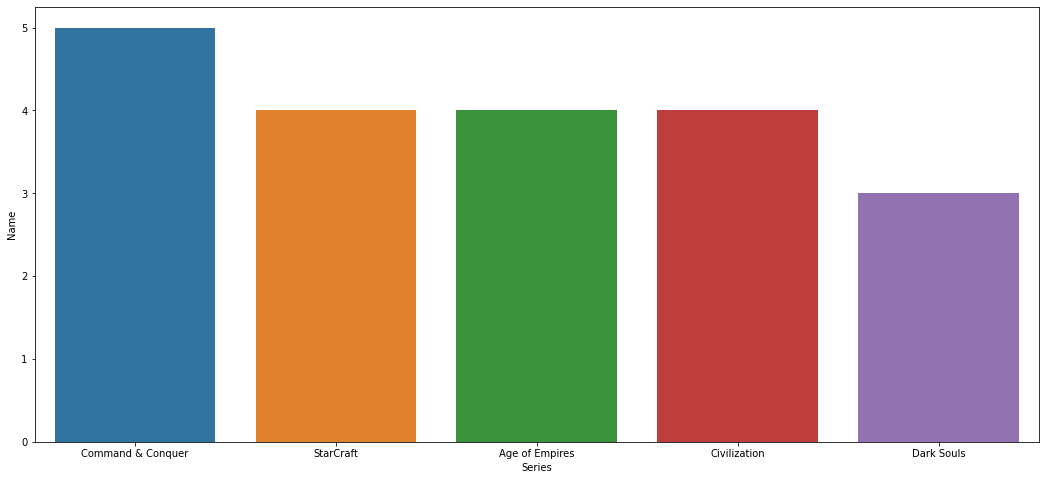

In [17]:
sns.barplot('Series', 'Name', data = series.sort_values('Name', ascending=False).head())